# **High Value Customer Identification (Insiders)**

## Solution Planning

### Input

**1. Business Problem**
- Select the most valuable customers to join a loyalty program.

**2. Dataset**
- E-commerce sales throughout one year.

### Output

**1. A list with the seleced customers.**
   - Format: 
   
|      client_id  |   is_insider  |  
|:---------------:|:-------------:|
|  10323          |   yes/1       | 
|  32415		  |    no/1       | 

**2. Report with the business questions' answers:**
- Who are the eligible customers to the program?
- How many customers will be part of the group?
- What are the main characteristics of these customers?
- What is the percentage of revenue contribution from the Insiders?
- What is the expected revenue from the Insiders for the next few months?
- What are the conditions for a person to be eligible as an Insider?
- What are the conditions for a person to be removed from the Insiders?
- What is the guarantee that the Insiders are better than the rest?
- What actions could be done by the marketing team to increase the revenue?

### Tasks

**1. Who are the eligible customers to the program?**
- What is being eligible? What is "the most valuable customers"?
- Valuable customers as:
    - Revenue:
        - High average ticket;
        - High life time value (LTV);
        - Low recency;
        - High basket size;
        - Low churn probability;
        - High LTV prediction;
        - High propensity to buy.
        
    - Cost:
        - Low return rate.  
   
    - Shopping experience:
        - High evaluation score.

**2. How many customers will be part of the group?**
- Customers that are Insiders divided by total customers.

**3. What are the main attributes of these customers?**
- Get customers characteristcs, such as:
    - Age;
    - Location;
    - ...
- Get consuption characteristics, such as:
    - Clustering attributes.
    
    
**4. What is the percentage of revenue contribution from the Insiders?**
- Revenue contribution from the Insiders divided by total revenue.

**5. What is the expected revenue from the Insiders for the next few months?**
- Insiders' LTV;
- Cohort analysis.

**6. What are the conditions for a person to be eligible as an Insider?**
- Define periodicity;
- The person needs to be similiar to an Insider.


**7. What are the conditions for a person to be removed from the Insiders?**
- Define periodicity;
- The person needs to be different in a certain level to an Insider.

**8. What is the guarantee that the Insiders are better than the rest?**
- A/B Testing;
- A/B Bayesian Testing;
- Hypothesis Testing.

**9. What actions could be done by the marketing team to increase the revenue?**
- Discount;
- Purchase preference;
- Low shipping;
- ...

## Solution Benchmark

### RFM Model

**1. Recency:**
- Time since the last purchase;
- Responsiveness.

**2. Frequency:**
- Mean time between transactions;
- Engagement.

**3. Monetary:**
- Total spent;
- Revenue.

![](img/rfm.png)

**1. Champions**
- Recent and frequent purchases, with high value;
- Prizes for these customers.

**2. Potential Loyalists**
- Recent purchases, with a good frequency and good value;
- Loyalty program and Upsell.

**3. New Customers**
- Recent purchase and low frequency;
- Relationship building and offers.

**4. At Risk Customer**
- It has been a long time since the last purchase;
- Reactivation campaigns, offers and products.

**5. Can't Lose Them**
- Understand the causes and offer some benefits.

# 1. Imports

In [1]:
import pandas  as pd
import numpy   as np
import seaborn as sns

from matplotlib              import pyplot as plt

from IPython.core.display    import HTML
from IPython.display         import Image

from sklearn.cluster         import KMeans
from yellowbrick.cluster     import KElbowVisualizer

## 1.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline

    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20,8]
    plt.rcParams['font.size'] = 11

    display( HTML( '<style>.container { width:80% !important; }</style>' ) )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    pd.set_option( 'display.max_columns', None )

    sns.set_style("darkgrid")
    sns.set_palette("muted")

In [3]:
jupyter_settings()

## 1.2. Load Dataset

In [4]:
# load data
df_raw = pd.read_csv( 'data/Ecommerce.csv',  encoding= 'unicode_escape' )

# drop extra column
df_raw.drop( columns='Unnamed: 8', axis=1, inplace=True)

In [5]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


# 2. Data Description

In [6]:
df2 = df_raw.copy()

## 2.1. Rename Columns

In [7]:
cols_new = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date', 'unit_price', 'customer_id', 'country']

# rename columns
df2.columns = cols_new
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


## 2.2. Data Dimensions

In [8]:
print( 'Number of rows: {}'.format( df2.shape[0] ) )
print( 'Number of columns: {}'.format( df2.shape[1] ) )

Number of rows: 541909
Number of columns: 8


## 2.3. Data Types

In [9]:
df2.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

## 2.4. Check NA

In [10]:
df2.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## 2.5. Replace NA

In [11]:
# remove NA
df2 = df2.dropna( subset=['description', 'customer_id'] )
print( 'Removed data: {:.2f}%'.format( ( 1 - ( df2.shape[0] / df_raw.shape[0] ) ) * 100 ) )
print( 'Rows left: {}'.format( df2.shape[0]  ) )

Removed data: 24.93%
Rows left: 406829


In [12]:
df2.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## 2.6. Change dtypes

In [13]:
# invoice date
df2['invoice_date'] = pd.to_datetime( df2['invoice_date'], format='%d-%b-%y' )

# customer_id
df2['customer_id'] = df2['customer_id'].astype( int )
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [14]:
df2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int32
country                 object
dtype: object

## 2.7. Descriptive Statistics

# 3. Feature Engineering

In [15]:
df3 = df2.copy()

## 3.1. Feature Creation

The dataset granularity should be customers, because the clusters will be for customers, but it is a unique key composed of product (stock_code) and date (invoice_date). So it is necessary to change the granularity.

In [16]:
# data reference
df_ref = df2[['customer_id']].drop_duplicates( ignore_index=True )
df_ref.head()

,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


In [17]:
# Gross Revenue (quantity * price)
df2['gross_revenue'] = df2['quantity'] * df2['unit_price']

# Monetary
df_monetary = df2[['customer_id', 'gross_revenue']].groupby( 'customer_id' ).sum().reset_index()
df_ref = pd.merge( df_ref, df_monetary, on='customer_id',  how='left')
df_ref.head()

,customer_id,gross_revenue
0,17850,5288.63
1,13047,3079.10
2,12583,7187.34
3,13748,948.25
4,15100,635.10


In [18]:
# Recency - Last day purchase
df_recency = df2[['customer_id', 'invoice_date']].groupby( 'customer_id' ).max().reset_index()
df_recency['recency_days'] = ( df2['invoice_date'].max() - df_recency['invoice_date'] ).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df_ref = pd.merge( df_ref, df_recency, on='customer_id', how='left' )
df_ref.head()

,customer_id,gross_revenue,recency_days
0,17850,5288.63,302
1,13047,3079.10,31
2,12583,7187.34,2
3,13748,948.25,95
4,15100,635.10,330


In [19]:
# Frequency
df_freq = df2[['customer_id', 'invoice_no']].drop_duplicates().groupby( 'customer_id' ).count().reset_index()
df_ref = pd.merge( df_ref, df_freq, on='customer_id', how='left' )
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_no
0,17850,5288.63,302,35
1,13047,3079.10,31,18
2,12583,7187.34,2,18
3,13748,948.25,95,5
4,15100,635.10,330,6


In [20]:
# checking possible NAs created by the merge
df_ref.isna().sum()

customer_id      0
gross_revenue    0
recency_days     0
invoice_no       0
dtype: int64

# 4. Data Filtering

In [21]:
df4 = df_ref.copy()

# 5. EDA

In [22]:
df5 = df4.copy()

# 6. Data Preparation

In [23]:
df6 = df5.copy()

# 7. Feature Selection

In [24]:
df7 = df6.copy()

# 8. Hyperparameter Fine-Tunning

In [40]:
X = df7.drop( columns=['customer_id'] )

clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10] 

## 8.1. Within-Cluster Sum of Squares ( WSS ) ( Elbow Method )

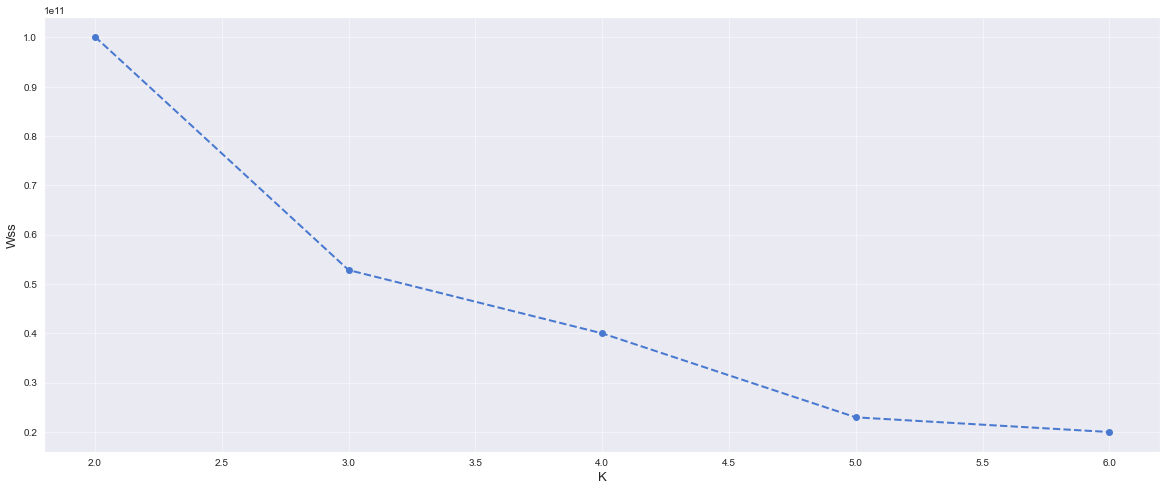

In [26]:
wss = []
for k in clusters:
    # model definition
    kmeans = KMeans( init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42 )
    
    # model training
    kmeans.fit( X )
    
    # validation
    wss.append( kmeans.inertia_ )
    
# plot wss
plt.plot( clusters, wss, linestyle='--', marker='o' )
plt.xlabel( 'K' )
plt.ylabel( 'Wss' );

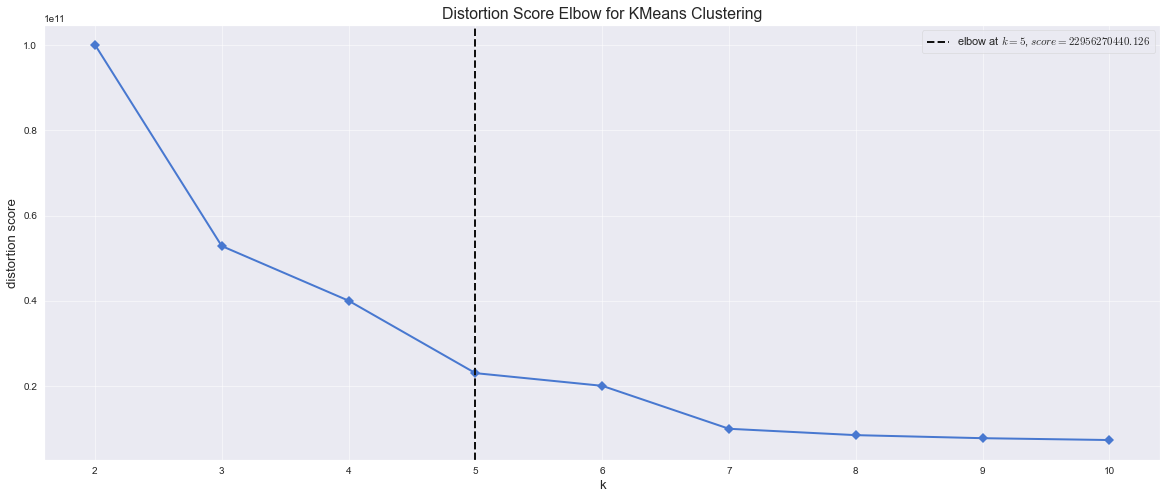

In [36]:
kmeans = KElbowVisualizer( KMeans( init='random', n_init=10, max_iter=300, random_state=0  ), k=clusters, timings=False )
kmeans.fit( X )
kmeans.show();

# 8.2. Silhouette Score

C:\Users\gutsc\anaconda3\envs\insiders_clustering\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\gutsc\anaconda3\envs\insiders_clustering\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\gutsc\anaconda3\envs\insiders_clustering\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


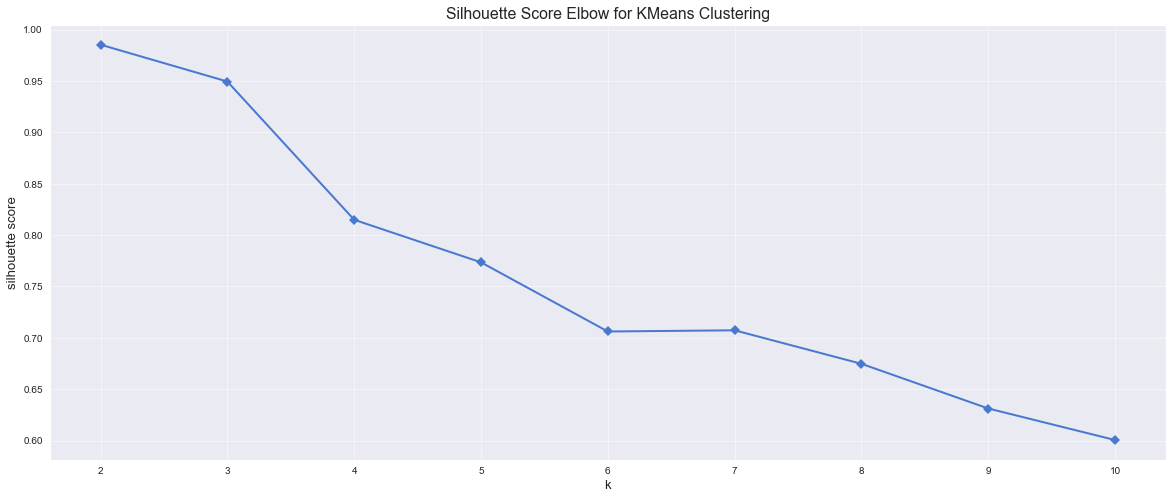

In [41]:
kmeans = KElbowVisualizer( KMeans( init='random', n_init=10, max_iter=300, random_state=0  ), k=clusters, timings=False, metric='silhouette' )
kmeans.fit( X )
kmeans.show();